In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [2]:
ra = 'glos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

http://data.glos.us/erddap


Pull in the processed inventory

In [3]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2021/data/processed/%s.xlsx' % ra.upper())
df

,Station ID,Dataset ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,NaN,obs_2,45013,"Station 45013 - Atwater Park, WI",Milwaukee Buoy ATW20 (45013),43.100000,-87.85,moored_buoy,2011-08-12 00:00:00,Y,Yp,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_o...",NaN
1,NaN,obs_43,45014,"Station 45014 - GB17 - South Green Bay, WI",Green Bay Buoy GB17 (45014),44.800000,-87.76,moored_buoy,2011-08-12 00:00:00,Y,Yp,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN
2,NaN,obs_61,45022,"Station 45022 - Little Traverse Bay, MI",Little Traverse Bay Buoy U-GLOS 004 (45022),45.403000,-85.088,moored_buoy,2009-07-29 00:00:00,Y,Yp,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN
3,NaN,obs_44,45023,"Station 45023 - North Entry Buoy, North Keween...",North Entry MTU Buoy (45023),47.270000,-88.607,moored_buoy,2010-07-08 00:00:00,Y,Yp,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_o...",currents at depths
4,NaN,obs_62,45024,"Station 45024 - Ludington Buoy, MI",Ludington Buoy (45024),43.977000,-86.559,moored_buoy,2009-08-04 00:00:00,Y,Yp,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_o...","This station also collects relative humidity, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,HTLPPOR,NaN,NaN,Portage,NaN,41.449444,-83.361389,fixed,>5 year,Y,Yp,Heidelberg University,academic,"mass_concentration_of_oxygen_in_sea_water, fra...",This platform has been operated by Heidelberg ...
89,HTLPSAN,NaN,NaN,Sandusky,NaN,41.307831,-83.158809,fixed,>5 year,Y,Yp,Heidelberg University,academic,"mass_concentration_of_oxygen_in_sea_water, fra...",This platform has been operated by Heidelberg ...
90,HTLPROC,NaN,NaN,Rock Ck,NaN,41.113611,-83.168333,fixed,>5 year,Y,Yp,Heidelberg University,academic,"mass_concentration_of_oxygen_in_sea_water, fra...",This platform has been operated by Heidelberg ...
91,HTLPHON,NaN,NaN,Honey Ck,NaN,41.037300,-83.0766,fixed,>5 year,Y,Yp,Heidelberg University,academic,"mass_concentration_of_oxygen_in_sea_water, fra...",This platform has been operated by Heidelberg ...


Search the ERDDAP server for a single station of interest - more of a test

In [4]:
df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

df['Station ID']

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\ioos-asset-inventory\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       obs_2
1      obs_43
2      obs_61
3      obs_44
4      obs_62
       ...   
88    HTLPPOR
89    HTLPSAN
90    HTLPROC
91    HTLPHON
92       FRCM
Name: Station ID, Length: 93, dtype: object

In [5]:
df_wf = df[df['Station ID'] == 'obs2']

# for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
search_for = df_wf['Station ID'].to_string()

search_url = e.get_search_url(search_for=search_for, response="csv")

try:
    resp = pd.read_csv(search_url)
    print(resp['Dataset ID'])
except:
    pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [20]:
not_found = []
found = dict()

for station in df['Station ID'].astype(str):
    
    if station == "nan":
        print("punting with station id = nan\n")
        not_found.append(station)
        continue
    
    try:
        search_url = e.get_search_url(search_for=station, response="csv")
        resp = pd.read_csv(search_url)
        print("Found \"%s\": %s" % (station,resp['Dataset ID'].values.tolist()))
        
        found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        #not_found.append(station)
#        pass
        print('no dataset matching \"%s\"' % station)
        station_long_name = df.loc[df['Station ID'] == station,'Station Long Name'].values.tolist()[0]
        
        if station_long_name == "nan":
                print("punting with statopm long name = nan\n")
                not_found.append(station)
                continue
                
        try:
            print('searching \"station long name\" = \"%s\"' % station_long_name)
            search_url = e.get_search_url(search_for=station_long_name, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (station_long_name,resp['Dataset ID'].values.tolist()))
            
            found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            station_wmo = str(df.loc[df['Station ID'] == station,'WMO ID or NWS/CMAN ID'].values.tolist()[0])
            
            if station_wmo == "nan":
                print("punting with station_wmo = nan\n")
                not_found.append(station)
                continue
            
            try:
                print('searching \"WMO ID\" = \"%s\"' % station_wmo)
                search_url = e.get_search_url(search_for=station_wmo, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (station_wmo,resp['Dataset ID'].values.tolist()))
                
                found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:    
                not_found.append(station)
        
    print("\n")

no dataset matching "obs_2"
searching "station long name" = "Station 45013 - Atwater Park, WI"
searching "WMO ID" = "45013"
Found "45013": ['45013', '45013_profile']


no dataset matching "obs_43"
searching "station long name" = "Station 45014 - GB17 - South Green Bay, WI"
searching "WMO ID" = "45014"
Found "45014": [45014]


no dataset matching "obs_61"
searching "station long name" = "Station 45022 - Little Traverse Bay, MI"
searching "WMO ID" = "45022"
Found "45022": [45022]


no dataset matching "obs_44"
searching "station long name" = "Station 45023 - North Entry Buoy, North Keweenaw Peninsula, MI"
searching "WMO ID" = "45023"
Found "45023": ['45023', '45023_profile']


no dataset matching "obs_62"
searching "station long name" = "Station 45024 - Ludington Buoy, MI"
searching "WMO ID" = "45024"
Found "45024": [45024]


no dataset matching "obs_46"
searching "station long name" = "Station 45025 - South Entry Buoy, South Keweenaw Peninsula, MI"
searching "WMO ID" = "45025"
Found "45

no dataset matching "HTLPBLA"
searching "station long name" = "Blanchard"
punting with id = nan

no dataset matching "HTLPPOR"
searching "station long name" = "Portage"
punting with id = nan

no dataset matching "HTLPSAN"
searching "station long name" = "Sandusky"
punting with id = nan

no dataset matching "HTLPROC"
searching "station long name" = "Rock Ck"
punting with id = nan

no dataset matching "HTLPHON"
searching "station long name" = "Honey Ck"
punting with id = nan

no dataset matching "FRCM"
searching "station long name" = "Fox River Continuous Monitoring Site"
punting with id = nan



Print the stations that we couldn't find.

In [21]:
not_found

['nan',
 'nan',
 'BARK_PT',
 'BGUSD2',
 'WLE-ESP',
 'nan',
 'NCWB',
 'OMOECP_E1 OMOECC_E1',
 'OMOECP_O1 OMOECC_O1',
 'UWSS-RAEON1',
 'UWSS-RAEON2-21',
 'UWSS-RAEON3-21',
 'RDC_NSF',
 'obs_96',
 'obs_97',
 'WALNUT',
 'BEACH2',
 'BEACH2_T',
 'BEACH6',
 'obs_98',
 'MBB',
 'TREC_T',
 'nan',
 'nan',
 'nan',
 'HTLPWOL',
 'HTLPTIF',
 'HTLPUTL',
 'HTLPSTU',
 'HTLPBLA',
 'HTLPPOR',
 'HTLPSAN',
 'HTLPROC',
 'HTLPHON',
 'FRCM']

In [22]:
df[df['Station ID'].isin(not_found)]

,Station ID,Dataset ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,geometry
30,BARK_PT,NaN,NaN,"Bark Point, WI buoy",NaN,46.898300,-94.1455,moored_buoy,2021-04-14 00:00:00,Y,Yp,University of Minnesota-Duluth,academic,"air_pressure_at_mean_sea_level, air_temperatur...",This buoy has not been included in previous IO...,POINT (-94.14550 46.89830)
31,BGUSD2,obs_79,NaN,Sandusky Bay buoy (bgsusd2),Sandusky Bay buoy (bgsusd2),41.496000,-82.75,moored_buoy,2017-06-27 00:00:00,Y,N,Bowling Green State University,academic,"wind_from_direction, wind_speed, air_temperatu...",NaN,POINT (-82.75000 41.49600)
39,WLE-ESP,obs_89,NaN,WLE-ESP,Nutrient buoy in Western Lake Erie deployed ne...,41.735100,-83.3007,moored_buoy,2021-05-08 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",GLERLWE13 was moved to WLE-ESP in 2021 to be c...,POINT (-83.30070 41.73510)
50,NCWB,NaN,NaN,North Central Winnebago Buoy,NaN,44.078740,-88.43824,NaN,2021-06-22 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"air_pressure_at_mean_sea_level, air_tempeartur...",This buoy has not been included in previous IO...,POINT (-88.43824 44.07874)
51,OMOECP_E1 OMOECC_E1,obs_93,NaN,Lake Erie - Central Basin 1 - OMOECP Environme...,Lake Erie - Central Basin 1 - OMOECC Environme...,42.409000,-81.636,moored_buoy,2016-07-12 00:00:00,Y,Yp,Ontario Ministry of the Environment and Climat...,gov_federal,fractional_saturation_of_oxygen_in_sea_water (...,GLOS is currently working with the partner to ...,POINT (-81.63600 42.40900)
52,OMOECP_O1 OMOECC_O1,NaN,NaN,Lake Erie - Central Basin 1 - OMOECP Environme...,Lake Erie - Central Basin 1 - OMOECC Environme...,43.801000,-79.012,moored_buoy,2016-07-12 00:00:00,Y,Yp,Ontario Ministry of the Environment and Climat...,gov_federal,"sea_water_turbidity, sea_water_temperature, se...",GLOS is currently working with the partner to ...,POINT (-79.01200 43.80100)
66,UWSS-RAEON1,NaN,NaN,UWSS_RAEON1,NaN,42.021850,-82.66967,moored_buoy,2020-08-25 00:00:00,Y,N,University of WIndsor,academic,"wind_from_direction, wind_speed, wind_speed_gu...",UWRAEON1 was moved and renamed to UWSS-RAEON1,POINT (-82.66967 42.02185)
67,UWSS-RAEON2-21,obs_73,NaN,UWSS-RAEON2-21,NaN,41.912797,-82.736286,moored_buoy,2021-05-20 00:00:00,Y,N,University of WIndsor,academic,"air_pressure_at_mean_sea_level, air_temperatur...",UWSS-RAEON2 was moved and renamed to UWSS-RAEO...,POINT (-82.73629 41.91280)
68,UWSS-RAEON3-21,obs_86,NaN,Uwindsor Raeon Buoy 3,UWRAEON3,41.973950,-82.78026,moored_buoy,2021-05-01 00:00:00,Y,N,University of Windsor,academic,"wind_from_direction, wind_speed, wind_speed_gu...",Hardware from UWRAEON3; t-string not functiona...,POINT (-82.78026 41.97395)
69,RDC_NSF,NaN,NaN,Radioacively-driven convection National Scienc...,A seasonal deployed buoy used to observe radio...,47.430000,-89.7133,moored_buoy,2021-04-14 00:00:00,Y,N,University of Minnesota-Duluth,academic,"air_pressure_at_mean_sea_level, air_temperatur...","Only deployed in the spring, per the PI's prop...",POINT (-89.71330 47.43000)


In [24]:
found.pop('HTLPWES')
found

{'obs_2': {'Dataset ID': ['45013', '45013_profile']},
 'obs_43': {'Dataset ID': [45014]},
 'obs_61': {'Dataset ID': [45022]},
 'obs_44': {'Dataset ID': ['45023', '45023_profile']},
 'obs_62': {'Dataset ID': [45024]},
 'obs_46': {'Dataset ID': [45025]},
 'obs_33': {'Dataset ID': ['45026', '45026_profile']},
 'obs_42': {'Dataset ID': [45027]},
 'obs_45': {'Dataset ID': [45028]},
 'obs_3 ': {'Dataset ID': [45029]},
 'obs_49': {'Dataset ID': [45161]},
 'obs_67': {'Dataset ID': [45162]},
 'obs_68': {'Dataset ID': [45163]},
 'obs_70': {'Dataset ID': [45164]},
 'obs_71': {'Dataset ID': [45165]},
 'obs_99': {'Dataset ID': [45167]},
 'obs_37': {'Dataset ID': [45168]},
 'obs_47': {'Dataset ID': [45170]},
 'obs_65': {'Dataset ID': [45173]},
 'obs_57': {'Dataset ID': [45174]},
 'obs_38': {'Dataset ID': ['45175', '45175_profile']},
 'obs_72': {'Dataset ID': ['45176', '45176b']},
 '45176b': {'Dataset ID': ['45176b']},
 'obs_58': {'Dataset ID': [45183]},
 'obs_60': {'Dataset ID': [45184]},
 'obs_59':

Check if the dataset has coverage for CY 2021

In [25]:
valid_datasets = []

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "2021-01-01"
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "2021-01-01"
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

non_2021_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for 2021:\n%s' % non_2021_datasets)

Datasets without coverage for 2021:
{'MTRI-NKW', 'MTRI-SKW', 'obs_65', 'ESF1', 'OSUSS', 'PA-DEP-1538'}


Show me the inventory metadata about the invalid stations:

In [32]:
bad_stations = df.loc[(df['Station ID'].isin(non_2021_datasets)) | df['Station ID'].isin(not_found)]

df['bad'] = df['Station ID'].isin(bad_stations['Station ID'])

In [33]:
df['bad']

0     False
1     False
2     False
3     False
4     False
      ...  
88     True
89     True
90     True
91     True
92     True
Name: bad, Length: 93, dtype: bool

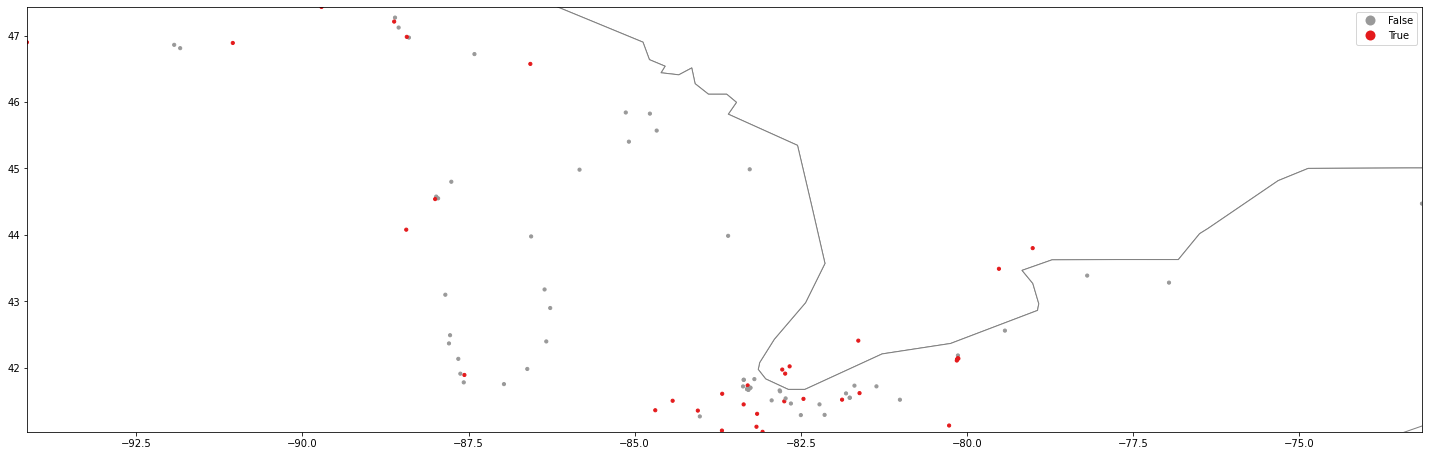

In [54]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='bad', 
         categorical=True, 
         cmap = 'Set1_r',
         markersize=10, 
         legend=True,
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

In [53]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.explore('bad',cmap = 'Set1_r',)

In [41]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,Station ID,Dataset ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,geometry,bad
